In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

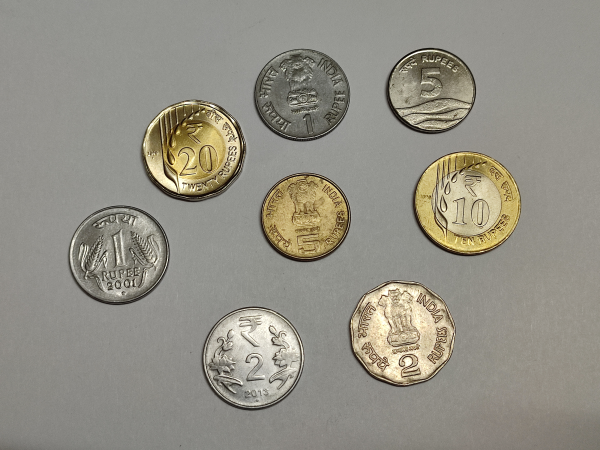

In [2]:
# Read the sample image and resize to a convenient scale
image = cv2.imread('sample.jpg')

w = 0.15 * image.shape[1]
h = 0.15 * image.shape[0]

dim = (int(w), int(h))
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(image)

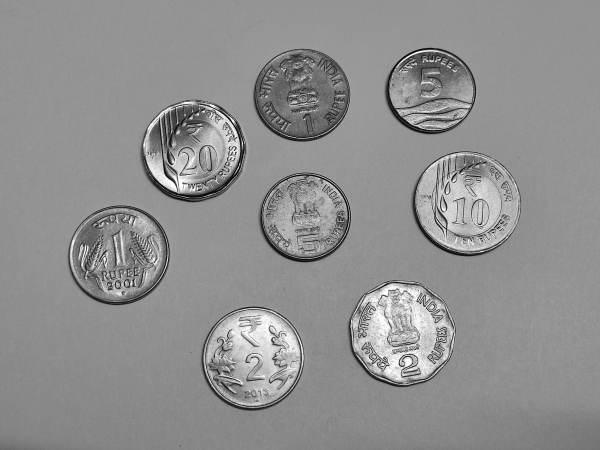

In [3]:
# Convert to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

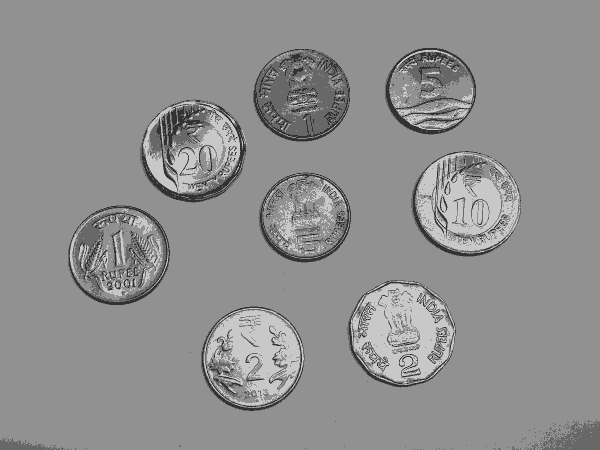

In [4]:
# Perform K-Means using 4 clusters
K = 4

Z = grayscale.reshape((-1, 1))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((grayscale.shape))

cv2_imshow(res2)

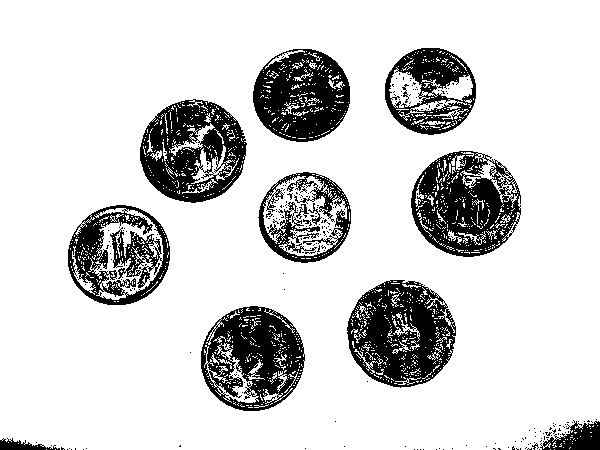

In [5]:
# Separate the background from the remaining pixels

segmented_image = label.reshape(grayscale.shape)

max_white_pixels = 0
max_centroid_index = None
max_mask = None

# Iterate through each centroid to find the one with maximum pixels

for i in range(K):
    # Create a binary mask for the current centroid:
    # white (255) where the condition is true, black (0) otherwise.
    mask = np.where(segmented_image == i, 255, 0).astype(np.uint8)

    # Count the number of white pixels (value 255)
    white_count = np.count_nonzero(mask == 255)

    # Check if this centroid has more white pixels than the previous maximum
    if white_count > max_white_pixels:
        max_white_pixels = white_count
        max_centroid_index = i
        max_mask = mask

cv2_imshow(max_mask)

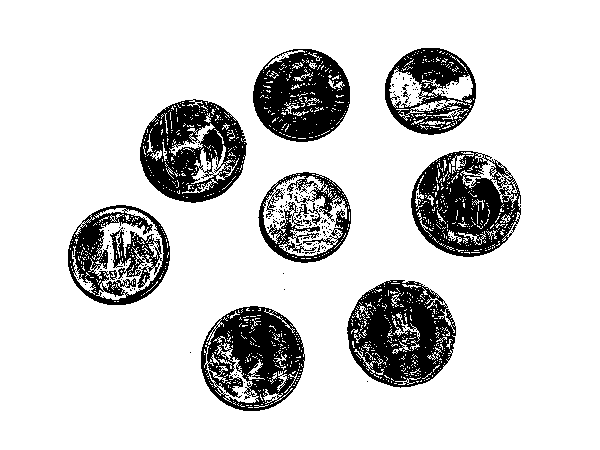

In [6]:
# Remove black pixels at the bottom
bottom_rows = int(max_mask.shape[0] * 0.07)
max_mask[-bottom_rows:, :] = 255
cv2_imshow(max_mask)

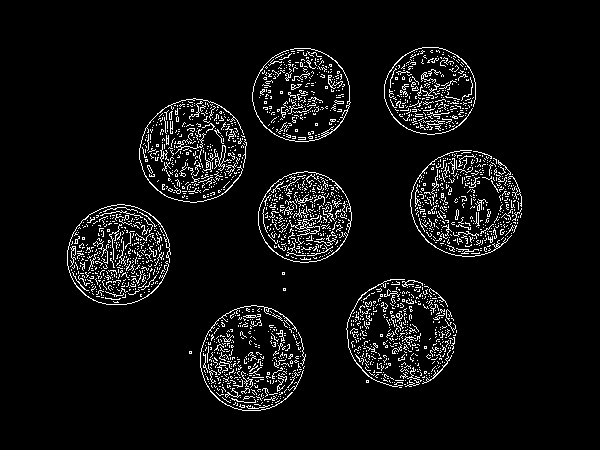

In [7]:
# Detecting edges using the Canny edge detection method
edges = cv2.Canny(max_mask,100,200)
cv2_imshow(edges)

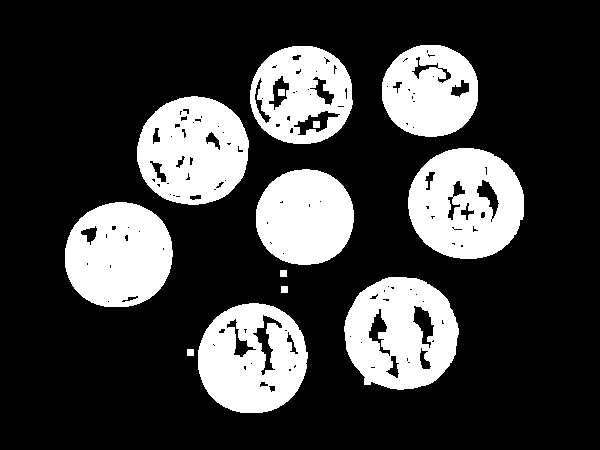

In [8]:
# Thicken the edges
kernel = np.ones((5, 5), np.uint8)
thick_edges = cv2.dilate(edges, kernel, iterations=1)
cv2_imshow(thick_edges)

Number of coins: 8


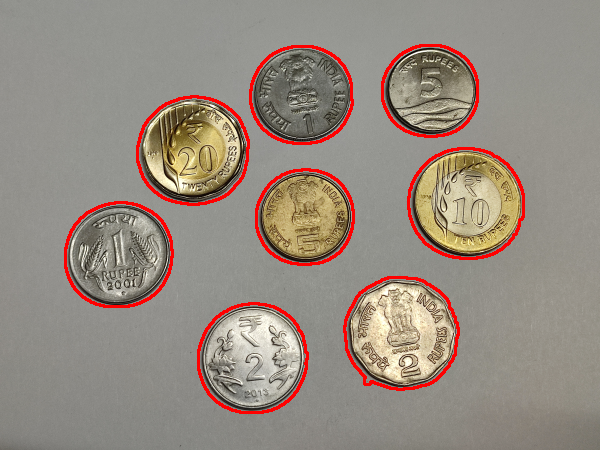

In [9]:
count = 0

# Find contours from the Canny edge image
contours, _ = cv2.findContours(thick_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Set threshold length for contours
min_length = 60
image_with_edges = image.copy()

# Loop over contours and draw only those with an arc length above the threshold
for cnt in contours:
    if cv2.arcLength(cnt, closed=True) > min_length:
        cv2.drawContours(image_with_edges, [cnt], -1, [0, 0, 255], thickness=2)
        count += 1

print(f"Number of coins: {count}")
cv2_imshow(image_with_edges)